# Cleaning the data

In [1]:
import pandas as pd
import numpy as np
import os

import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Function to display at most 1000 rows and at most 1000 columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Administrative boundaries

In [84]:
# Read barangay-level admin boundaries from shp file
brgy_dir = './Reference/Administrative Boundaries - BARMM Barangays ao 20190206 (PSA 2016)'
brgy_file = 'AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp'
brgy_bounds = gpd.read_file(os.path.join(brgy_dir, brgy_file))

# Read municipality-level admin boundaries from shp file
muni_dir = './Reference/Administrative Boundaries - BARMM Municipalities ao 20190206 (PSA 2016)'
muni_file = 'AdministrativeBoundariesBARMMMunicipalities20190206PSA2016.shp'
muni_bounds = gpd.read_file(os.path.join(muni_dir, muni_file))

# Read province-level admin boundaries from shp file
province_dir = './Reference/Administrative Boundaries - BARMM Provinces ao 20190206 (PSA2016)'
province_file = 'AdministrativeBoundariesBARMMProvinces20190206PSA2016.shp'
province_bounds = gpd.read_file(os.path.join(province_dir, province_file))

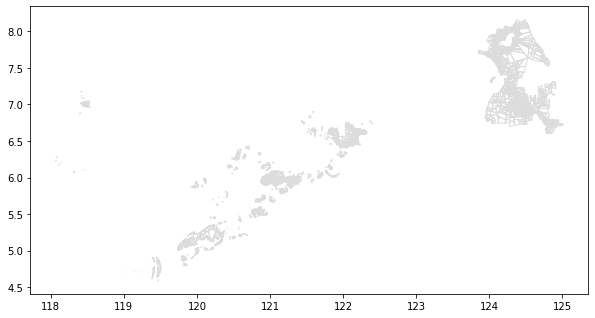

In [4]:
# Change coordinate reference system to 4326 (lat/long)
brgy_bounds['geometry'] = brgy_bounds['geometry'].to_crs(epsg=4326)
brgy_bounds['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

<AxesSubplot:>

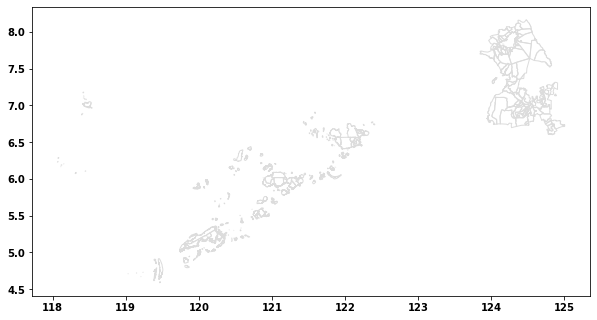

In [5]:
# Change coordinate reference system to 4326 (lat/long)
muni_bounds['geometry'] = muni_bounds['geometry'].to_crs(epsg=4326)
muni_bounds['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

<AxesSubplot:>

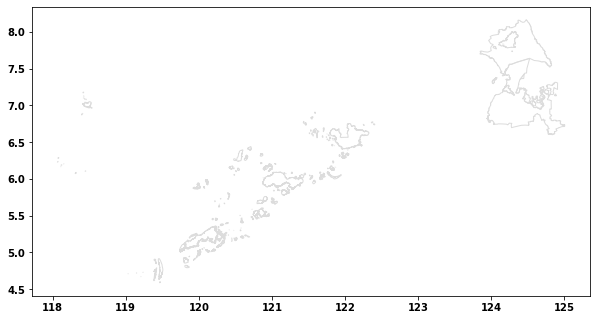

In [6]:
# Change coordinate reference system to 4326 (lat/long)
province_bounds['geometry'] = province_bounds['geometry'].to_crs(epsg=4326)
province_bounds['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

## Population

In [101]:
# Read barangay-level population
pop_dir = '../Data/Reference'
pop_file = 'Population 2010, 2015 ARMM,BCT.csv'
pop = pd.read_csv(os.path.join(pop_dir, pop_file))
pop

,REGI,PSGC_REGI,PROV,PSGC_PROV,MuniCities,PSGC_CITY/MUNI,BrgyName,PSGC_BRGY,BCT,Pop2010,...,80_abv_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,80_abv_fem
0,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Arco,PH150702001,1,800,...,3.0,23.0,0.0,1.0,3.0,0.0,8.0,6.0,2.0,3.0
1,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Ba-as,PH150702002,1,1266,...,3.0,72.0,0.0,9.0,13.0,16.0,13.0,14.0,7.0,0.0
2,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Baimbing,PH150702004,1,451,...,0.0,25.0,0.0,4.0,1.0,3.0,4.0,8.0,4.0,1.0
3,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balagtasan,PH150702005,1,2597,...,6.0,76.0,1.0,2.0,10.0,18.0,24.0,7.0,13.0,1.0
4,Autonomous Region In Muslim Mindanao,PH150000000,Basilan,PH150700000,City Of Lamitan,PH150702000,Balas,PH150702006,1,2809,...,2.0,166.0,2.0,26.0,39.0,28.0,32.0,28.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,Soccsksargen,PH120000000,Cotabato City (Not A Province),PH129800000,Cotabato City,PH129804000,Tamontaka I,PH129804033,2,3743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,Soccsksargen,PH120000000,Cotabato City (Not A Province),PH129800000,Cotabato City,PH129804000,Tamontaka II,PH129804034,2,4034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,Soccsksargen,PH120000000,Cotabato City (Not A Province),PH129800000,Cotabato City,PH129804000,Tamontaka III,PH129804035,2,2679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2719,Soccsksargen,PH120000000,Cotabato City (Not A Province),PH129800000,Cotabato City,PH129804000,Tamontaka IV,PH129804036,2,2446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Age groups for health: children (under 18), adults (18-59), elderly (60-above)
pop['Total_under18'] = pop.loc[:, 'sin_age_bot_und_001':'sin_age_bot_017'].sum(axis=1)
pop['Total_18to59'] = pop.loc[:, 'sin_age_bot_018':'sin_age_bot_059'].sum(axis=1)
pop['Total_over60'] = pop.loc[:, 'sin_age_bot_060':'sin_age_bot_080_and_ove'].sum(axis=1)

pop['Male_under18'] = pop.loc[:, 'sin_age_mal_und_001':'sin_age_mal_017'].sum(axis=1)
pop['Male_18to59'] = pop.loc[:, 'sin_age_mal_018':'sin_age_mal_059'].sum(axis=1)
pop['Male_over60'] = pop.loc[:, 'sin_age_mal_060':'sin_age_mal_080_and_ove'].sum(axis=1)

pop['Female_under18'] = pop.loc[:, 'sin_age_fem_und_001':'sin_age_fem_017'].sum(axis=1)
pop['Female_18to59'] = pop.loc[:, 'sin_age_fem_018':'sin_age_fem_059'].sum(axis=1)
pop['Female_over60'] = pop.loc[:, 'sin_age_fem_060':'sin_age_fem_080_and_ove'].sum(axis=1)

In [129]:
# Aggregate population by city/municipality
brgy_pop = pop.groupby('PSGC_BRGY').agg('sum').reset_index()
brgy_pop

,PSGC_BRGY,BCT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,Tot_sin_age_bot,sin_age_bot_und_001,...,80_abv_fem,Total_under18,Total_18to59,Total_over60,Male_under18,Male_18to59,Male_over60,Female_under18,Female_18to59,Female_over60
0,PH099701002,2,5150,5469,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH099701004,2,530,873,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH099701005,2,2329,2557,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PH099701006,2,2729,2863,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH099701007,2,1705,1755,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,PH157011012,1,2326,2509,2509.0,377.0,351.0,26.0,2509.0,57.0,...,0.0,1114.0,1283.0,112.0,548.0,627.0,64.0,566.0,656.0,48.0
2717,PH157011013,1,2610,3050,3050.0,472.0,445.0,27.0,3050.0,92.0,...,0.0,1220.0,1701.0,129.0,609.0,875.0,65.0,611.0,826.0,64.0
2718,PH157011014,1,1433,1559,1559.0,303.0,288.0,15.0,1559.0,32.0,...,0.0,666.0,842.0,51.0,363.0,412.0,30.0,303.0,430.0,21.0
2719,PH157011015,1,2016,2216,2216.0,322.0,303.0,19.0,2216.0,40.0,...,2.0,913.0,1187.0,116.0,451.0,610.0,66.0,462.0,577.0,50.0


In [104]:
# Keep desired features for health only
pop_feat = ['Total_under18', 'Total_18to59', 'Total_over60',
           'Male_under18', 'Male_18to59', 'Male_over60',
           'Female_under18', 'Female_18to59', 'Female_over60',]

muni_pop = pop.groupby('PSGC_CITY/MUNI').agg('sum')[pop_feat]

In [105]:
muni_pop

,Total_under18,Total_18to59,Total_over60,Male_under18,Male_18to59,Male_over60,Female_under18,Female_18to59,Female_over60
PSGC_CITY/MUNI,,,,,,,,,
PH099701000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PH103502000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PH103514000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PH103515000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PH103520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
PH157007000,14185.0,14104.0,1101.0,7052.0,7052.0,630.0,7133.0,7052.0,471.0
PH157008000,2010.0,2514.0,203.0,1078.0,1311.0,119.0,932.0,1203.0,84.0
PH157009000,15987.0,16615.0,892.0,8236.0,8542.0,543.0,7751.0,8073.0,349.0


## Health

### Hospitals & Regional Health Units

In [85]:
hospitals_rhus = pd.read_csv('./Health/hospitals_rhus.csv', index_col=0)
hospitals_rhus

,category,subcategory,PSGC_BRGY,PSGC_CITY_MUNI,PSGC_PROV,FacilityName,latitude,longitude
0,health,Hospital,NaN,PH150702000,PH150700000,Lamitan District Hospital,6.656280,122.136584
1,health,Hospital,PH150705031,PH150705000,PH150700000,Sumisip District Hospital,6.425996,122.006554
2,health,Hospital,NaN,PH150702000,PH150700000,Lamitan Infirmary,6.656264,122.136576
3,health,Hospital,PH153626034,PH153626000,PH153600000,Tamparan District Hospital,7.876309,124.328168
4,health,Hospital,NaN,PH153615000,PH153600000,Dr. Serapio Montaner Memorial Hospital,7.581081,124.080893
...,...,...,...,...,...,...,...,...
123,health,Rural Health Unit,PH157005023,PH157005000,PH157000000,SITANGKAI RURAL HEALTH UNIT,4.680702,119.404872
124,health,Rural Health Unit,PH157006029,PH157006000,PH157000000,SOUTH UBIAN RURAL HEALTH UNIT,5.190862,120.487850
125,health,Rural Health Unit,PH157006025,PH157006000,PH157000000,TABAWAN RURAL HEALTH UNIT,5.206348,120.598414
126,health,Rural Health Unit,PH157007033,PH157007000,PH157000000,TANDUBAS RURAL HEALTH UNIT,5.126325,120.339227


In [88]:
hospitals_rhus['geometry'] = gpd.points_from_xy(hospitals_rhus['longitude'], hospitals_rhus['latitude'])
hospitals_rhus

,category,subcategory,PSGC_BRGY,PSGC_CITY_MUNI,PSGC_PROV,FacilityName,latitude,longitude,geometry
0,health,Hospital,NaN,PH150702000,PH150700000,Lamitan District Hospital,6.656280,122.136584,POINT (122.136584 6.656280000000001)
1,health,Hospital,PH150705031,PH150705000,PH150700000,Sumisip District Hospital,6.425996,122.006554,POINT (122.006554 6.425996)
2,health,Hospital,NaN,PH150702000,PH150700000,Lamitan Infirmary,6.656264,122.136576,POINT (122.136576 6.656264)
3,health,Hospital,PH153626034,PH153626000,PH153600000,Tamparan District Hospital,7.876309,124.328168,POINT (124.328168 7.876309)
4,health,Hospital,NaN,PH153615000,PH153600000,Dr. Serapio Montaner Memorial Hospital,7.581081,124.080893,POINT (124.080893 7.581081)
...,...,...,...,...,...,...,...,...,...
123,health,Rural Health Unit,PH157005023,PH157005000,PH157000000,SITANGKAI RURAL HEALTH UNIT,4.680702,119.404872,POINT (119.4048722 4.6807023)
124,health,Rural Health Unit,PH157006029,PH157006000,PH157000000,SOUTH UBIAN RURAL HEALTH UNIT,5.190862,120.487850,POINT (120.4878498 5.1908616)
125,health,Rural Health Unit,PH157006025,PH157006000,PH157000000,TABAWAN RURAL HEALTH UNIT,5.206348,120.598414,POINT (120.5984143 5.206348200000001)
126,health,Rural Health Unit,PH157007033,PH157007000,PH157000000,TANDUBAS RURAL HEALTH UNIT,5.126325,120.339227,POINT (120.3392266 5.126325)


In [89]:
hospitals_rhus = gpd.GeoDataFrame(hospitals_rhus)

In [90]:
hospitals_rhus.dtypes

category            object
subcategory         object
PSGC_BRGY           object
PSGC_CITY_MUNI      object
PSGC_PROV           object
FacilityName        object
latitude           float64
longitude          float64
geometry          geometry
dtype: object

In [91]:
muni_bounds.dtypes

Reg_Code      object
Reg_Name      object
Pro_Code      object
Pro_Name      object
Mun_Code      object
Mun_Name      object
geometry    geometry
dtype: object

Since barangay codes (`PSGC-BRGY1`) are incomplete, aggregate health facilities on a city/municipality level.

In [92]:
muni_bounds

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,geometry
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153630000,WAO,"POLYGON ((700871.930 833452.624, 700856.661 83..."
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156619000,OMAR,"MULTIPOLYGON (((320738.229 655464.103, 320738...."
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156609000,PARANG,"MULTIPOLYGON (((265503.963 665305.251, 265436...."
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153807000,DATU ODIN SINSUAT (DINAIG),"POLYGON ((643236.434 772763.330, 639700.317 77..."
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153621000,PIAGAPO,"POLYGON ((622215.389 879150.806, 621481.484 87..."
...,...,...,...,...,...,...,...
120,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153837000,SHARIFF SAYDONA MUSTAPHA,"POLYGON ((662425.039 765933.317, 658937.813 76..."
121,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153814000,KABUNTALAN (TUMBAO),"POLYGON ((654938.289 786548.868, 655264.480 78..."
122,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153829000,RAJAH BUAYAN,"POLYGON ((675608.192 759795.821, 674755.816 75..."
123,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153614000,MADAMBA,"POLYGON ((623024.539 865864.904, 623065.603 86..."


In [93]:
# List municipality codes within BARMM
muni_list = muni_bounds['Mun_Code']
muni_list

0      PH153630000
1      PH156619000
2      PH156609000
3      PH153807000
4      PH153621000
          ...     
120    PH153837000
121    PH153814000
122    PH153829000
123    PH153614000
124    PH153619000
Name: Mun_Code, Length: 125, dtype: object

In [94]:
# Create a copy of municipality bounds to store health features
health_df = muni_bounds.copy(deep=True)

In [95]:
# Count number of health facilities within each municipality
num_hospitals_rhus = lambda x: len(hospitals_rhus[hospitals_rhus['geometry'].within(x)==True])

health_df['num_hospitals_rhus'] = muni_bounds.apply(lambda row: num_hospitals_rhus(row['geometry']), axis=1)

In [96]:
health_df

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,geometry,num_hospitals_rhus
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153630000,WAO,"POLYGON ((700871.930 833452.624, 700856.661 83...",0
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156619000,OMAR,"MULTIPOLYGON (((320738.229 655464.103, 320738....",0
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156609000,PARANG,"MULTIPOLYGON (((265503.963 665305.251, 265436....",0
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153807000,DATU ODIN SINSUAT (DINAIG),"POLYGON ((643236.434 772763.330, 639700.317 77...",0
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153621000,PIAGAPO,"POLYGON ((622215.389 879150.806, 621481.484 87...",0
...,...,...,...,...,...,...,...,...
120,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153837000,SHARIFF SAYDONA MUSTAPHA,"POLYGON ((662425.039 765933.317, 658937.813 76...",0
121,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153814000,KABUNTALAN (TUMBAO),"POLYGON ((654938.289 786548.868, 655264.480 78...",0
122,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153829000,RAJAH BUAYAN,"POLYGON ((675608.192 759795.821, 674755.816 75...",0
123,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153614000,MADAMBA,"POLYGON ((623024.539 865864.904, 623065.603 86...",0


In [97]:
health_df['num_hospitals_rhus'].value_counts()

0    125
Name: num_hospitals_rhus, dtype: int64

### Summary Statistics for Dashboard

In [145]:
hospitals_rhus.head()

,category,subcategory,PSGC_BRGY,PSGC_CITY_MUNI,PSGC_PROV,FacilityName,latitude,longitude,geometry
0,health,Hospital,NaN,PH150702000,PH150700000,Lamitan District Hospital,6.656280,122.136584,POINT (122.13658 6.65628)
1,health,Hospital,PH150705031,PH150705000,PH150700000,Sumisip District Hospital,6.425996,122.006554,POINT (122.00655 6.42600)
2,health,Hospital,NaN,PH150702000,PH150700000,Lamitan Infirmary,6.656264,122.136576,POINT (122.13658 6.65626)
3,health,Hospital,PH153626034,PH153626000,PH153600000,Tamparan District Hospital,7.876309,124.328168,POINT (124.32817 7.87631)
4,health,Hospital,NaN,PH153615000,PH153600000,Dr. Serapio Montaner Memorial Hospital,7.581081,124.080893,POINT (124.08089 7.58108)


In [205]:
# Drop duplicates, Drop NaN, reorder
health_info = hospitals_rhus[['PSGC_BRGY', 'PSGC_CITY_MUNI','PSGC_PROV','subcategory','FacilityName','latitude','longitude','geometry']].drop_duplicates(subset='PSGC_BRGY', keep='first').reset_index(drop=True)
health_info = health_info[health_info['PSGC_BRGY'].notna()]

In [206]:
#Check population columns
[x for x in brgy_pop.columns]

['PSGC_BRGY',
 'BCT',
 'Pop2010',
 'Pop2015',
 'HH_pop',
 'num_hh0',
 'num_hh0_mal',
 'num_hh0_fem',
 'Tot_sin_age_bot',
 'sin_age_bot_und_001',
 'sin_age_bot_001',
 'sin_age_bot_002',
 'sin_age_bot_003',
 'sin_age_bot_004',
 'sin_age_bot_005',
 'sin_age_bot_006',
 'sin_age_bot_007',
 'sin_age_bot_008',
 'sin_age_bot_009',
 'sin_age_bot_010',
 'sin_age_bot_011',
 'sin_age_bot_012',
 'sin_age_bot_013',
 'sin_age_bot_014',
 'sin_age_bot_015',
 'sin_age_bot_016',
 'sin_age_bot_017',
 'sin_age_bot_018',
 'sin_age_bot_019',
 'sin_age_bot_020',
 'sin_age_bot_021',
 'sin_age_bot_022',
 'sin_age_bot_023',
 'sin_age_bot_024',
 'sin_age_bot_025',
 'sin_age_bot_026',
 'sin_age_bot_027',
 'sin_age_bot_028',
 'sin_age_bot_029',
 'sin_age_bot_030',
 'sin_age_bot_031',
 'sin_age_bot_032',
 'sin_age_bot_033',
 'sin_age_bot_034',
 'sin_age_bot_035',
 'sin_age_bot_036',
 'sin_age_bot_037',
 'sin_age_bot_038',
 'sin_age_bot_039',
 'sin_age_bot_040',
 'sin_age_bot_041',
 'sin_age_bot_042',
 'sin_age_bot_0

In [207]:
health_info = pd.merge(health_info, pd.concat([brgy_pop['PSGC_BRGY'],brgy_pop.iloc[:,-9:]],axis=1))

In [208]:
# Change BRGY Names
brgy_name_lookup = brgy_bounds.iloc[:,-3:-1].rename(columns={'Bgy_Code':'PSGC_BRGY'})
health_info['PSGC_BRGY'] = pd.merge(health_info['PSGC_BRGY'], brgy_name_lookup)['Bgy_Name']
health_info.head()

,PSGC_BRGY,PSGC_CITY_MUNI,PSGC_PROV,subcategory,FacilityName,latitude,longitude,geometry,Total_under18,Total_18to59,Total_over60,Male_under18,Male_18to59,Male_over60,Female_under18,Female_18to59,Female_over60
0,Luuk-Bait,PH150705000,PH150700000,Hospital,Sumisip District Hospital,6.425996,122.006554,POINT (122.00655 6.42600),695.0,786.0,72.0,342.0,363.0,41.0,353.0,423.0,31.0
1,Picarabawan,PH153626000,PH153600000,Hospital,Tamparan District Hospital,7.876309,124.328168,POINT (124.32817 7.87631),197.0,234.0,7.0,127.0,115.0,4.0,70.0,119.0,3.0
2,Western Wao (Pob.),PH153630000,PH153600000,Hospital,Wao District Hospital,7.638157,124.722074,POINT (124.72207 7.63816),1147.0,1208.0,142.0,570.0,605.0,64.0,577.0,603.0,78.0
3,Salipongan,PH153603000,PH153600000,Hospital,Balindong Municipal Hospital,7.916969,124.197904,POINT (124.19790 7.91697),538.0,477.0,28.0,286.0,241.0,14.0,252.0,236.0,14.0
4,Emie Punud,PH153617000,PH153600000,Hospital,Marawi City Hospital,8.000298,124.300232,POINT (124.30023 8.00030),1019.0,764.0,19.0,445.0,370.0,13.0,574.0,394.0,6.0


In [209]:
# TOTAL number of RHUs and Hospitals
health_info['subcategory'].value_counts()

Rural Health Unit    104
Hospital              15
Name: subcategory, dtype: int64

In [210]:
# Brgy Health Facility count
health_info.groupby(['PSGC_BRGY','subcategory'])['subcategory'].count().sort_values(ascending=False)

PSGC_BRGY           subcategory      
Poblacion           Rural Health Unit    7
Ilian               Rural Health Unit    2
Western Wao (Pob.)  Hospital             1
Maitumaig           Rural Health Unit    1
Dilausan            Rural Health Unit    1
                                        ..
Poblacion (Parang)  Rural Health Unit    1
Poblacion II        Rural Health Unit    1
Punay (Pob.)        Rural Health Unit    1
Romangaob (Pob.)    Rural Health Unit    1
Adaon               Rural Health Unit    1
Name: subcategory, Length: 112, dtype: int64

In [211]:
# Add tracking values to segregate hospitals from rhus
health_info['hospital_exist'] = (health_info['subcategory'] == 'Hospital').astype(int)
health_info['rhu_exist'] = (health_info['subcategory'] == 'Rural Health Unit').astype(int)

**Merge Data per Brgy**

In [212]:
health_info_merged = health_info.groupby('PSGC_BRGY').sum()

# Add Health Facility count
health_info_merged['hospital_count'] = health_info.groupby('PSGC_BRGY')['hospital_exist'].sum()
health_info_merged['rhu_count'] = health_info.groupby('PSGC_BRGY')['rhu_exist'].sum()


health_info_merged

,latitude,longitude,Total_under18,Total_18to59,Total_over60,Male_under18,Male_18to59,Male_over60,Female_under18,Female_18to59,Female_over60,hospital_exist,rhu_exist,hospital_count,rhu_count
PSGC_BRGY,,,,,,,,,,,,,,,
Adaon,6.933333,124.333333,1821.0,1533.0,101.0,992.0,765.0,46.0,829.0,768.0,55.0,0,1,0,1
Alu Layag-Layag,5.958554,120.887214,2177.0,1421.0,54.0,1260.0,710.0,36.0,917.0,711.0,18.0,0,1,0,1
Amito Marantao,7.991047,124.271332,630.0,570.0,24.0,299.0,289.0,9.0,331.0,281.0,15.0,0,1,0,1
Anuling,6.017574,121.016308,8348.0,8462.0,694.0,4116.0,4072.0,344.0,4232.0,4390.0,350.0,0,1,0,1
Asturias,6.046614,121.001609,11571.0,10861.0,653.0,5650.0,5263.0,309.0,5921.0,5598.0,344.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tumahubong,6.502415,122.066700,889.0,956.0,74.0,435.0,472.0,46.0,454.0,484.0,28.0,0,1,0,1
Tumbao,6.701522,124.829438,3222.0,2313.0,95.0,1728.0,1156.0,66.0,1494.0,1157.0,29.0,0,1,0,1
Tunggol,7.050118,124.763031,2085.0,2673.0,218.0,984.0,1326.0,97.0,1101.0,1347.0,121.0,0,1,0,1


**Summary Statistics**

In [213]:
#Summary Statistics
health_info_merged.describe()

,latitude,longitude,Total_under18,Total_18to59,Total_over60,Male_under18,Male_18to59,Male_over60,Female_under18,Female_18to59,Female_over60,hospital_exist,rhu_exist,hospital_count,rhu_count
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,6.952586,125.261932,2321.598214,2262.035714,141.419643,1177.437500,1107.133929,72.107143,1144.160714,1154.901786,68.848214,0.133929,0.928571,0.133929,0.928571
std,3.104609,50.162122,3532.746234,3475.298618,205.894604,1832.631244,1699.941417,102.413695,1703.240380,1776.292510,103.394479,0.342106,0.680676,0.342106,0.680676
min,0.000000,0.000000,197.000000,150.000000,6.000000,109.000000,78.000000,3.000000,70.000000,72.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6.032530,121.088314,707.000000,768.500000,39.750000,348.000000,368.250000,20.750000,354.500000,390.250000,19.750000,0.000000,1.000000,0.000000,1.000000
50%,6.906422,124.175633,1431.500000,1402.500000,74.500000,715.000000,678.500000,40.000000,707.500000,717.000000,37.000000,0.000000,1.000000,0.000000,1.000000
75%,7.712631,124.344568,2239.500000,2204.250000,149.000000,1149.500000,1046.000000,74.750000,1109.000000,1146.750000,73.250000,0.000000,1.000000,0.000000,1.000000
max,36.657735,622.283956,30108.000000,30487.000000,1639.000000,15753.000000,14887.000000,789.000000,14355.000000,15600.000000,850.000000,1.000000,7.000000,1.000000,7.000000


### COVID-19 Information
#### Data Source: DOH (https://drive.google.com/drive/folders/1GH42-1V02YAEi1LD0ilbq1a0zmoNxjgI)
1. Number of COVID-19 cases
2. Number of hospital beds (ICU beds, isolation beds, COVID dedicated beds)
3. Number of ventilators
4. Number of hospital staff (doctors, nurses, others in quarantine/admitted as suspect, probable, confirmed cases)

In [19]:
covid_dir = '../Data/Health'
bedtracker_file= 'DOH COVID Data Drop_ 20210222 - 05 DOH Data Collect - Daily Report.csv'
hospital_beds = pd.read_csv(os.path.join(covid_dir, bedtracker_file))
hospital_beds.shape

(299688, 54)

In [20]:
cases_file= 'DOH COVID Data Drop_ 20210222 - 04 Case Information.csv'
cases = pd.read_csv(os.path.join(covid_dir, cases_file))
cases.shape

D:\Users\Rein\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(563456, 22)

In [21]:
# Filter hospital beds and cases info to BARMM municipalities only
hospital_beds = hospital_beds[hospital_beds['city_mun_psgc'].isin(muni_list)]
cases = cases[cases['CityMuniPSGC'].isin(muni_list)]

In [22]:
print(len(hospital_beds))
print(len(cases))

9626
4630


#### Hospital beds

In [23]:
# Number of records per hospital
hospital_beds['cfname'].value_counts()

COTABATO MEDICAL SPECIALIST HOSPITAL                            235
NOTRE DAME HOSPITAL AND SCHOOL OF MIDWIFERY, INC.               235
MINDANAO DOCTORS HOSPITAL AND CANCER CENTER, INC.               235
MIDSAYAP COMMUNITY DOCTORS HOSPITAL                             235
MIDSAYAP DIAGNOSTIC CENTER AND HOSPITAL                         235
KABACAN MEDICAL SPECIALIST, INC.                                235
ALEOSAN DISTRICT HOSPITAL                                       235
UNAYAN MUNICIPAL HOSPITAL                                       235
WAO DISTRICT HOSPITAL                                           235
SULU SANITARIUM                                                 234
DR. R.A.M. ALBUTRA GENERAL HOSPITAL                             234
BULUAN DISTRICT HOSPITAL                                        234
COTABATO REGIONAL AND MEDICAL CENTER                            234
AMAI PAKPAK MEDICAL CENTER                                      234
ANECITO T. PESANTE SR. MEMORIAL HOSPITAL CO.    

In [24]:
# Keep only latest information from hospitals
hospital_beds = hospital_beds.drop_duplicates(subset='cfname', keep='last')
hospital_beds

,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,isolbed_v,isolbed_o,...,trans_ttmf,discharged,region,region_psgc,province,province_psgc,city_mun,city_mun_psgc,north_coord,east_coord
5862,DOH000000000002762,126170.0,CRUZADO MEDICAL HOSPITAL,2021-02-21 11:28:28,2021-02-21 11:28:28,2021-02-21 00:00:00,0.0,0.0,6.0,0.0,...,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO (NORTH COTABATO),PH124700000,PIKIT,PH124712000,0.0,0.0
8434,DOH000000000003976,126207.0,COTABATO MEDICAL SPECIALIST HOSPITAL,2021-02-21 11:46:59,2021-02-21 11:46:59,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO CITY (NOT A PROVINCE),PH129800000,COTABATO CITY,PH129804000,0.0,0.0
31357,DOH000000000006882,NaN,HOLY FAMILY HOSPITAL,NaN,NaN,2021-02-21 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,TAWI-TAWI,PH157000000,BONGAO (CAPITAL),PH157002000,0.0,0.0
34399,DOH000000000038478,126582.0,DR. R.A.M. ALBUTRA GENERAL HOSPITAL,2021-02-21 15:39:13,2021-02-21 15:39:13,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO (NORTH COTABATO),PH124700000,KABACAN,PH124703000,0.0,0.0
40487,DOH000000000005763,126854.0,TUAN LIGADDUNG LIPAE MEMORIAL HOSPITAL,2021-02-21 19:17:06,2021-02-21 19:17:06,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,TAWI-TAWI,PH157000000,SAPA-SAPA,PH157010000,0.0,0.0
42342,DOH000000000005030,NaN,SULU PROVINCIAL HOSPITAL,NaN,NaN,2021-02-21 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,SULU,PH156600000,JOLO (CAPITAL),PH156602000,0.0,0.0
49134,DOH000000000000421,126270.0,BALINDONG MUNICIPAL HOSPITAL,2021-02-21 12:20:54,2021-02-21 12:20:54,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,LANAO DEL SUR,PH153600000,BALINDONG (WATU),PH153603000,0.0,0.0
56802,DOH000000000006002,120728.0,CAMP SIONGCO STATION HOSPITAL,2021-02-18 09:48:58,2021-02-18 09:48:58,2021-02-21 00:00:00,0.0,0.0,4.0,4.0,...,2.0,0.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,MAGUINDANAO,PH153800000,DATU ODIN SINSUAT (DINAIG),PH153807000,0.0,0.0
67782,DOH000000000000684,126312.0,"NOTRE DAME HOSPITAL AND SCHOOL OF MIDWIFERY, INC.",2021-02-21 12:47:14,2021-02-21 12:47:14,2021-02-21 00:00:00,0.0,0.0,10.0,2.0,...,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO CITY (NOT A PROVINCE),PH129800000,COTABATO CITY,PH129804000,0.0,0.0
71698,DOH000000000003354,126282.0,SIASI DISTRICT HOSPITAL,2021-02-21 12:28:44,2021-02-21 12:28:44,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,...,0.0,0.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,SULU,PH156600000,SIASI,PH156612000,0.0,0.0


In [25]:
display_all(hospital_beds.head())

,hfhudcode,id,cfname,updateddate,addeddate,reportdate,icu_v,icu_o,isolbed_v,isolbed_o,beds_ward_v,beds_ward_o,mechvent_v,mechvent_o,icu_v_nc,icu_o_nc,nonicu_v_nc,nonicu_o_nc,mechvent_v_nc,mechvent_o_nc,qnurse,qdoctor,qother,nurse_adm,doctor_adm,other_adm,susp_asym,susp_mild,susp_severe,susp_crit,susp_died,prob_asym,prob_mild,prob_severe,prob_crit,prob_died,conf_asym,conf_mild,conf_severe,conf_crit,conf_died,tpatient_adm,tpatient_er,tpatient_icu,trans_ttmf,discharged,region,region_psgc,province,province_psgc,city_mun,city_mun_psgc,north_coord,east_coord
5862,DOH000000000002762,126170.0,CRUZADO MEDICAL HOSPITAL,2021-02-21 11:28:28,2021-02-21 11:28:28,2021-02-21 00:00:00,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,9.0,0.0,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO (NORTH COTABATO),PH124700000,PIKIT,PH124712000,0.0,0.0
8434,DOH000000000003976,126207.0,COTABATO MEDICAL SPECIALIST HOSPITAL,2021-02-21 11:46:59,2021-02-21 11:46:59,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO CITY (NOT A PROVINCE),PH129800000,COTABATO CITY,PH129804000,0.0,0.0
31357,DOH000000000006882,NaN,HOLY FAMILY HOSPITAL,NaN,NaN,2021-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,TAWI-TAWI,PH157000000,BONGAO (CAPITAL),PH157002000,0.0,0.0
34399,DOH000000000038478,126582.0,DR. R.A.M. ALBUTRA GENERAL HOSPITAL,2021-02-21 15:39:13,2021-02-21 15:39:13,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,38.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,REGION XII (SOCCSKSA RGEN),PH120000000,COTABATO (NORTH COTABATO),PH124700000,KABACAN,PH124703000,0.0,0.0
40487,DOH000000000005763,126854.0,TUAN LIGADDUNG LIPAE MEMORIAL HOSPITAL,2021-02-21 19:17:06,2021-02-21 19:17:06,2021-02-21 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH150000000,TAWI-TAWI,PH157000000,SAPA-SAPA,PH157010000,0.0,0.0


In [26]:
"""
Get the ff. features:
- Number of hospital beds (ICU beds, isolation beds, COVID dedicated beds)
- Number of ventilators
- Number of hospital staff (doctors, nurses, others in quarantine as suspect, probable, confirmed cases)

Metadata / column description:
    'icu_o': 'num_occupied_icu_beds',
    'icu_v': 'num_vacant_icu_beds',
    'beds_ward_o': 'num_occupied_beds',
    'beds_ward_v': 'num_vacant_beds',
    'isolbed_o': 'num_occupied_isolation_beds',
    'isolbed_v': 'num_vacant_isolation_beds',
    'mechvent_o': 'num_occupied_ventilators',
    'mechvent_v': 'num_vacant_ventilators',
    'qdoctor': 'quarantined_doctors',
    'qnurse': 'quarantined_nurses',
    'qother': 'quarantined_other_staff',
    'doctor_adm': 'admitted_doctors',
    'nurse_adm': 'admitted_nurses',
    'other_adm': 'admitted_other_staff'})
"""
# Rename features
hospital_beds.rename(columns={'cfname':'hospital_name',
                             'mechvent_o': 'occupied_ventilators',
                             'mechvent_v': 'vacant_ventilators'}, inplace=True)

# Simplify features by combining similar ones
hospital_beds['num_occupied_beds'] = hospital_beds['icu_o'] + hospital_beds['beds_ward_o'] + hospital_beds['isolbed_o']
hospital_beds['num_vacant_beds'] = hospital_beds['icu_v'] + hospital_beds['beds_ward_v'] + hospital_beds['isolbed_v']
hospital_beds['num_staff_quarantined'] = hospital_beds['qdoctor'] + hospital_beds['qnurse'] + hospital_beds['qother']
hospital_beds['num_staff_admitted'] = hospital_beds['doctor_adm'] + hospital_beds['nurse_adm'] + hospital_beds['other_adm']

# Keep only desired features
hospital_beds = hospital_beds[['city_mun', 'city_mun_psgc', 'hospital_name',
                              'num_occupied_beds', 'num_vacant_beds', 'num_staff_quarantined', 'num_staff_admitted',
                              'occupied_ventilators', 'vacant_ventilators']]
hospital_beds

,city_mun,city_mun_psgc,hospital_name,num_occupied_beds,num_vacant_beds,num_staff_quarantined,num_staff_admitted,occupied_ventilators,vacant_ventilators
5862,PIKIT,PH124712000,CRUZADO MEDICAL HOSPITAL,0.0,6.0,0.0,0.0,0.0,0.0
8434,COTABATO CITY,PH129804000,COTABATO MEDICAL SPECIALIST HOSPITAL,0.0,0.0,0.0,0.0,0.0,0.0
31357,BONGAO (CAPITAL),PH157002000,HOLY FAMILY HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN
34399,KABACAN,PH124703000,DR. R.A.M. ALBUTRA GENERAL HOSPITAL,0.0,7.0,0.0,0.0,0.0,0.0
40487,SAPA-SAPA,PH157010000,TUAN LIGADDUNG LIPAE MEMORIAL HOSPITAL,0.0,0.0,0.0,0.0,0.0,0.0
42342,JOLO (CAPITAL),PH156602000,SULU PROVINCIAL HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN
49134,BALINDONG (WATU),PH153603000,BALINDONG MUNICIPAL HOSPITAL,0.0,0.0,0.0,0.0,0.0,0.0
56802,DATU ODIN SINSUAT (DINAIG),PH153807000,CAMP SIONGCO STATION HOSPITAL,4.0,17.0,0.0,0.0,0.0,0.0
67782,COTABATO CITY,PH129804000,"NOTRE DAME HOSPITAL AND SCHOOL OF MIDWIFERY, INC.",2.0,10.0,0.0,0.0,0.0,1.0
71698,SIASI,PH156612000,SIASI DISTRICT HOSPITAL,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Checking missing values per column
hospital_beds.isnull().sum()

city_mun                 0
city_mun_psgc            0
hospital_name            0
num_occupied_beds        5
num_vacant_beds          5
num_staff_quarantined    5
num_staff_admitted       5
occupied_ventilators     5
vacant_ventilators       5
dtype: int64

In [28]:
# Dropping rows with missing info
hospital_beds = hospital_beds[~hospital_beds['num_occupied_beds'].isnull()]

In [29]:
covid_feat =['num_occupied_beds', 'num_vacant_beds', 'num_staff_quarantined', 'num_staff_admitted', 'occupied_ventilators', 'vacant_ventilators']

num_equipment = lambda x, y: len(hospital_beds[(hospital_beds['city_mun_psgc']==x)][y])

for feat in covid_feat:
    health_df[feat] = health_df.apply(lambda row: num_equipment(row['Mun_Code'], feat), axis=1)

In [30]:
health_df.head()

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,geometry,num_hospitals_rhus,num_occupied_beds,num_vacant_beds,num_staff_quarantined,num_staff_admitted,occupied_ventilators,vacant_ventilators
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153630000,WAO,"POLYGON ((700871.930 833452.624, 700856.661 83...",0,0,0,0,0,0,0
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156619000,OMAR,"MULTIPOLYGON (((320738.229 655464.103, 320738....",0,0,0,0,0,0,0
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156609000,PARANG,"MULTIPOLYGON (((265503.963 665305.251, 265436....",0,1,1,1,1,1,1
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153807000,DATU ODIN SINSUAT (DINAIG),"POLYGON ((643236.434 772763.330, 639700.317 77...",0,2,2,2,2,2,2
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153621000,PIAGAPO,"POLYGON ((622215.389 879150.806, 621481.484 87...",0,0,0,0,0,0,0


#### Cases

In [31]:
# Checking missing values per column
cases.isnull().sum()

CaseCode                0
Age                     8
AgeGroup                8
Sex                     0
DateSpecimen          563
DateResultRelease     522
DateRepConf             0
DateDied             4503
DateRecover          3533
RemovalType           191
Admitted             2996
RegionRes               0
ProvRes                 0
CityMunRes              0
CityMuniPSGC            0
BarangayRes           917
BarangayPSGC          917
HealthStatus            0
Quarantined             0
DateOnset            2668
Pregnanttab          2321
ValidationStatus     1367
dtype: int64

In [32]:
cases['HealthStatus'].value_counts()

RECOVERED       4312
MILD             171
DIED             127
SEVERE            11
ASYMPTOMATIC       5
CRITICAL           2
MODERATE           2
Name: HealthStatus, dtype: int64

In [33]:
# Aggregate cases by city/municipality code
num_covid_cases = lambda x: len(cases[cases['CityMuniPSGC']==x])
health_df['num_covid_cases'] = health_df.apply(lambda row: num_covid_cases(row['Mun_Code']), axis=1)

# Aggregate cases by city/municipality code and health status
health_status = ['RECOVERED', 'ASYMPTOMATIC', 'MILD', 'MODERATE', 'SEVERE', 'CRITICAL', 'DIED']
num_covid_cases_by_status = lambda x, y: len(cases[(cases['CityMuniPSGC']==x) & (cases['HealthStatus']==y)])

for status in health_status:
    health_df[status] = health_df.apply(lambda row: num_covid_cases_by_status(row['Mun_Code'], status), axis=1)

In [34]:
health_df.tail()

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,geometry,num_hospitals_rhus,num_occupied_beds,num_vacant_beds,...,occupied_ventilators,vacant_ventilators,num_covid_cases,RECOVERED,ASYMPTOMATIC,MILD,MODERATE,SEVERE,CRITICAL,DIED
120,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153837000,SHARIFF SAYDONA MUSTAPHA,"POLYGON ((662425.039 765933.317, 658937.813 76...",0,0,0,...,0,0,3,3,0,0,0,0,0,0
121,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153814000,KABUNTALAN (TUMBAO),"POLYGON ((654938.289 786548.868, 655264.480 78...",0,0,0,...,0,0,6,5,0,1,0,0,0,0
122,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153829000,RAJAH BUAYAN,"POLYGON ((675608.192 759795.821, 674755.816 75...",0,0,0,...,0,0,7,6,0,1,0,0,0,0
123,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153614000,MADAMBA,"POLYGON ((623024.539 865864.904, 623065.603 86...",0,0,0,...,0,0,2,1,0,1,0,0,0,0
124,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153619000,MULONDO,"POLYGON ((650841.061 873927.541, 650629.125 87...",0,0,0,...,0,0,12,11,0,0,0,0,0,1


In [35]:
muni_pop.head()

NameError: name 'muni_pop' is not defined

In [ ]:
# Merge with population
health_df = health_df.merge(muni_pop, how='left', left_on='Mun_Code', right_index=True)

In [ ]:
health_df.to_csv('health.csv')

In [ ]:
health_df

In [ ]:
health_df.dtypes